# Introduction to Linear Regression

*Adapted from Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/)*

Will be using [Pandas](https://pandas.pydata.org/docs/user_guide/10min.html) and [scikit-learn](http://scikit-learn.org/stable/).

Instructions:


*   Questions are marked by the sign ⏩. Provide the answer after the question, either in a code cell or in a text cell (or both).
*   Upload the notebook on the website of the course. Direct emails will be ignored. -- Deadline : one week after the day of the lab. 
* Your notebook is an individual work. 


In [2]:
# imports
%pip install pandas matplotlib seaborn scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# this allows plots to appear directly in the notebook
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


## I. The Dataset

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [3]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)

⏩ **1) Use `data.head()` and `data.head(10)`: describe the dataset.**

In [4]:
data.head()
data.head(10)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


What are the features?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the response?
- Sales: sales of a single product in a given market (in thousands of widgets)

⏩ **2) Use data.shape. How many examples are contained in the dataset?**

⏩ **3) Use data.describe() and provide your comments.**

In [5]:
data.shape
# there are 200 examples

(200, 4)

In [6]:
data.describe()
# the mean sales are approximately 14,000 widgets and with a min of 1600 and max of 27000 widgets
# the mean dollor spent on TV ad are approximately 147043 with a min of $700 and max of $296400
# the mean dollor spent on Radio ad are approximately $23264 with a min of $0 and max of $49600
# the mean dollor spent on Newspaper ad are approximately $30554 with a min of $0 and max of $45100
# the TV advertising has the largest mean and range($700 - $296400) among the 3 media types, means that TV ad the main advertising channel, and all products have spent some money on it
# Newspaper advertising shows a wide spread with a relatively large standard deviation, suggesting potential outliers.

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


⏩ **4) Use data['Name_column'].hist() to draw the histogram of the sales. Set the parameters in order to plot 20 bins (= bars of the histogram. On the histogram, locate the 25% quantile given by the describe() method of the previous question.**

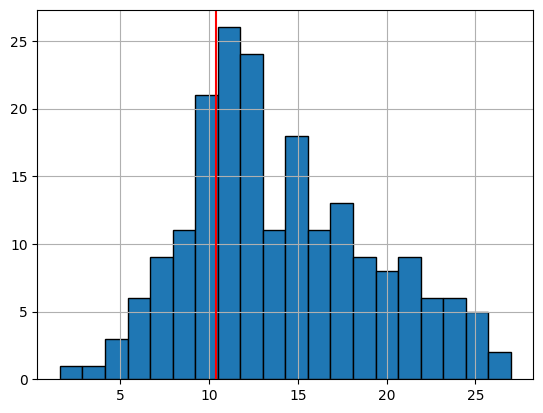

In [7]:
data['Sales'].hist(bins = 20, edgecolor = 'black')
plt.axvline(10.375, color = 'red')

⏩ **5) Comment the result of data.boxplot(). What is the interest of this plot?**

<Axes: >

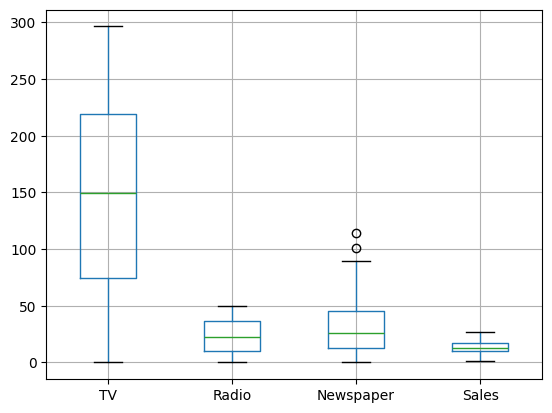

In [8]:
data.boxplot()
# the boxplot shows the medians, 25%&75% quantiles and the outliers of the ads of TV, Radio, Newspaper and the quantities of sales
# TV and Radio show relatively symmetric distributions with no outliers
# Newspaper ad distribution is looks more spread and right skewed and there are some outliers above the upper whisker, means that for some products, the newspaper ad spending is relatively vary high compare to other procucts
# the distribution of sales is fairly symmetric with a little bit right skewed

⏩ **5) Use data.plot(kind='scatter', x=..., y=...) to vizualize the relationship between the features and the response. Comment about the relevance of the use of a linear model.**

⏩ **6) Use data.corr() in order to plot the correlation coefficients.**

**Comment about the coefficient on the diagonal.**

**What feature is the most correlated to the sales?**

**Plot the correlation matrix as a heatmap using sns.heatmap(...,annot=True)** 

<Axes: >

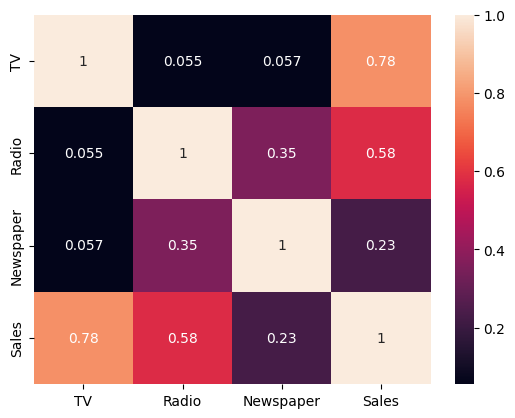

In [9]:
corr = data.corr()
sns.heatmap(corr,annot = True)

# the corr coefficient on the diagonal are all 1. Because the self-correlation are always 1.
# the TV advertising is the most correlated to sales with corr coefficient 0.78

### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## II. Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):
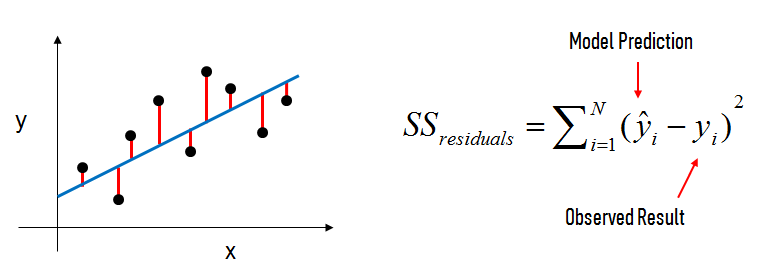

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

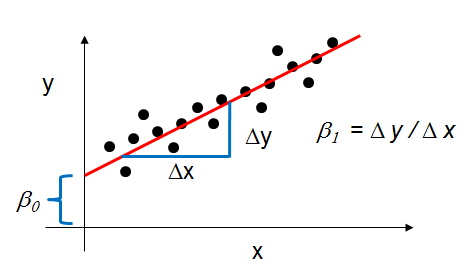





⏩ **7) We are going to do linear regression of the sales with respect to ONE variable amongst 'TV', 'Radio', 'Newspaper'. According to what you have seen from the dataset, which column would you like to keep? Write it down under the form:**

`columns = ['Name of the column you want to keep']`

In [10]:
columns = ['TV']

⏩ **8) Run the code below and try to understand it. What are the value of $\beta_0$ and $\beta_1$ of you model?**

In [11]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.linear_model import LinearRegression
ls = LinearRegression()
ls.fit(data[columns],data['Sales'])
ls.intercept_,ls.coef_[0]
# the value of beta0 is around 7.03, the value of beta1 is around 0.048

(np.float64(7.032593549127695), np.float64(0.04753664043301975))

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

⏩ **9) Let's say that there was a new market where the spend in the advertising channel you considered was $50,000. What would we predict for the Sales in that market? Make the prediction "by hand" using sums and multiplication of numbers.**

In [13]:
# manually calculate the prediction
predict_sales = 7.032593549127695 + 0.04753664043301975 * 50
predict_sales
# the predict sales with $50000 spending on TV ads are 9409.43 widgets

9.409425570778682

⏩ **10) Use sklearn's predict method to recover the above result:**



```
New_data = pd.DataFrame({'Name of your column' : [the value]})
ls.predict(New_data)[0]
```




In [14]:
New_data = pd.DataFrame({'TV' : [50]})
ls.predict(New_data)[0]

np.float64(9.409425570778682)

⏩ **11) Using `ls.predict`, generate the predictions $\hat y_i$ for the whole dataset. On the same graph, plot the scattered points $(x_i,y_i)$ and the line passing through the points $(x_i,\hat y_i)$.**

Text(0, 0.5, 'Sales')

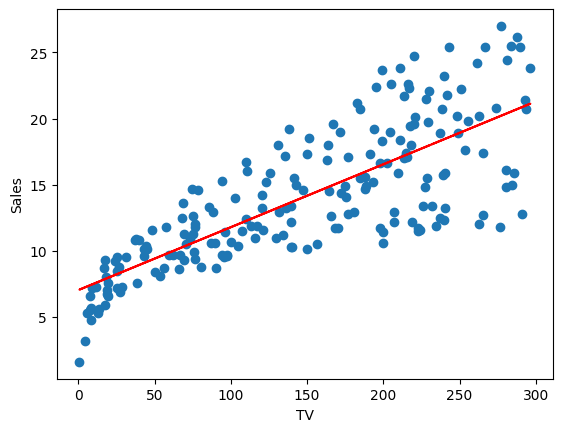

In [15]:
y_hat = ls.predict(data[columns])

plt.scatter(data[columns], data['Sales'])
plt.plot(data[columns], y_hat, color = 'red')
plt.xlabel(columns[0])
plt.ylabel('Sales')

⏩ **12) Write your comments. How happy are you with the model?**

The model captures a clear positive trend between TV advertising and sales. The regression line fits the data reasonably well, and the residuals are fairly symmetric. However, the model is simple, including other features may improve accuracy.

## III. Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

⏩ **13) Include all the three columns in the model and re-train a least-square estimator using scikit-learn. Provide the values of the coefficients $\beta_i$.**

In [16]:
features = ['TV', 'Radio', 'Newspaper'] # list of feature
multi_ls = LinearRegression()
multi_ls.fit(data[features], data['Sales'])
multi_ls.intercept_, multi_ls.coef_



(np.float64(2.938889369459412), array([ 0.04576465,  0.18853002, -0.00103749]))

⏩ **14) For a given amount of Radio and Newspaper ad spending, how much is the increase of sells resulting from a $1000 increase in TV ad spending?**

For given $1000 spending on TV ads, the predict sales gonna increase 45.76 widgets.

### Linear Gaussian model and confidence intervals

Our aim is now to compute confidence intervals on each of the coefficients $\beta_i$ at the level 95%. A way to think of a confidence interval is the following: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient. Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

To that end, we make the assumption that the model is homoscedastic, which means linear, Gaussian, and with a constant variance $\sigma^2$:
$$
Y \sim {\mathcal N}(\Phi \beta,\sigma^2 I_N)
$$
where $N$ is the number of sambles, $d=3$ is the number of regressors, $\Phi$ is the $N\times (d+1)$ design matrix containing the values of the regressors (TV, Radio, Newspaper), $\beta=(\beta_0,\dots,\beta_d)^T$ and $\sigma^2$ are the unknown parameters, and $I_N$ is the $N\times N$ identity matrix.

A 95% confidence interval on $\beta_k$ is given by:
$$
\hat\beta_k \pm q \sqrt{\frac {\hat\sigma^2 s_k}N}
$$
where $s_k$ is the $k$th coefficient of the diagonal of $(\Phi^T\Phi)^{-1}$, $\hat \sigma^2$ is the estimated variance of the residuals, given by:
$$
\hat \sigma^2 = \frac{\|Y-\hat Y\|^2}{N-d-1}
$$

⏩ **15) What is $q$ in the above formula?**

The value of q corresponds to the quantile of the standard normal (or Student’s t) distribution associated with the desired confidence level.
For a 95% confidence interval, q = 1.96 if using the standard normal distribution.

⏩ **16) Draw the histogram of the residuals $e_i=\hat y_i-y_i$, using 20 bins.**

**Without calculating it numerically, what is APPROXIMATELY the mean and the standard deviation?**

**Does it make sense to assume that the residuals are Gaussian?**

(array([ 6., 17., 33., 29., 41., 20., 15.,  9., 13.,  6.,  5.,  2.,  2.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.8292226 , -2.24637712, -1.66353163, -1.08068615, -0.49784066,
         0.08500482,  0.66785031,  1.25069579,  1.83354128,  2.41638677,
         2.99923225,  3.58207774,  4.16492322,  4.74776871,  5.33061419,
         5.91345968,  6.49630516,  7.07915065,  7.66199613,  8.24484162,
         8.8276871 ]),
 <BarContainer object of 20 artists>)

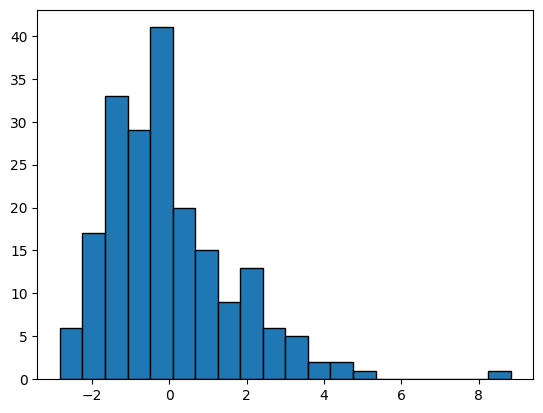

In [17]:
y_actual = data['Sales'] # actual yi
y_predict = multi_ls.predict(data[features]) # generate preidct yi
residuals = y_predict - y_actual


plt.hist(residuals, bins = 20, edgecolor = 'black')

# the mean of the residuals are 0, since the yi_hat is an unbiased estimator of yi, thus the mean of their diff is 0 
# if assume most of the data fall into +3 std and -3 std, then the std of residuals are approximately around 1.5 - 2
# the linear combination of Gussian variables are also Gussian variable, thus the residuals are expected to distribute normally.
# According to the histogram, the distribution is a bell curve and looks symmetric in some sence, thus, it is also make snese to assume the residual is a Gussian variable

The following function computes confidence intervals. The syntax is as follows:


```
confidence_interval(X,y,a,k)
```

where `X` is a $N\times d$ pandas dataframe corresponding to the design matrix, `y` is a pandas series corresponding to the labels, $a$ is the confidence level between 0 and 1 (typically set to 0.95), and $k\in\{0,1,\dots,d\}$ represents the variable you would like to consider.

⏩ **17) Compute the confidence intervals for the 3 variables.**

In [18]:
def confidence_interval(X,y,a,k): # y is our prediction
  assert(a<1)
  (N,d) = X.shape
  lsf = LinearRegression()
  lsf.fit(X,y)
  variance = np.linalg.norm(y.values-lsf.predict(X))**2/(N-d-1)
  Phi = np.concatenate((np.reshape(np.ones(N),(N,1)),X.to_numpy()),axis=1)
  s = np.diag(np.linalg.inv(np.dot(Phi.T,Phi)))[k]
  q = stats.t(df=N-d-1).ppf(1-(1-a)/2)
  return (lsf.coef_[k-1]-q*np.sqrt(variance*s/N),lsf.coef_[k-1]+q*np.sqrt(variance*s/N))

In [19]:
tv_ci = confidence_interval(data[['TV', 'Radio', 'Newspaper']], data['Sales'], 0.95, 1) # 1 represents the first coeffcient, 0 represents the intercept
radio_ci = confidence_interval(data[['TV', 'Radio', 'Newspaper']], data['Sales'], 0.95, 2)
newspaper_ci = confidence_interval(data[['TV', 'Radio', 'Newspaper']], data['Sales'], 0.95, 3)

print ("95% CI for TV: ", tv_ci )
print ("95% CI for Radio: ", radio_ci )
print ("95% CI for Newspaper: ", newspaper_ci )


95% CI for TV:  (np.float64(0.045570125082648495), np.float64(0.04595916582814671))
95% CI for Radio:  (np.float64(0.18732916791434018), np.float64(0.18973086592206873))
95% CI for Newspaper:  (np.float64(-0.0018562138103885356), np.float64(-0.00021877227456412133))


⏩ **18) Compute confidence intervals at 99%. Based on this result, if you wanted to eliminate one feature from the model, which one would it be? Explain.**

In [20]:
tv_ci = confidence_interval(data[['TV', 'Radio', 'Newspaper']], data['Sales'], 0.99, 1) # 1 represents the first coeffcient, 0 represents the intercept
radio_ci = confidence_interval(data[['TV', 'Radio', 'Newspaper']], data['Sales'], 0.99, 2)
newspaper_ci = confidence_interval(data[['TV', 'Radio', 'Newspaper']], data['Sales'], 0.99, 3)

print ("99% CI for TV: ", tv_ci )
print ("99% CI for Radio: ", radio_ci )
print ("99% CI for Newspaper: ", newspaper_ci )

# the 99% CI for Newspaper ads contains a 0, means it may not be statistical significant. Therefore, if I want to eliminate one feature, that would be the newspaper


99% CI for TV:  (np.float64(0.045508083829348116), np.float64(0.04602120708144709))
99% CI for Radio:  (np.float64(0.18694616341886586), np.float64(0.19011387041754305))
99% CI for Newspaper:  (np.float64(-0.002117340507949598), np.float64(4.235442299694095e-05))


## IV. Model selection by cross-validation

Consider we seek to choose between two models:


*   The first one includes all the columns `TV`, `Radio`, `Newspaper`
*   The second one includes only `TV` and `Radio`

Which one should one choose?

**Cross-validation.** provides a reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

⏩ **19) Use sklearn `train_test_split` method to spli the data into a train and a test set (see the doc [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). Then, fit two linear regressors on the train set only: one using all features, the other using only `TV` and`Radio`.**

In [44]:
from sklearn.model_selection import train_test_split

X_full = data[['TV', 'Radio', 'Newspaper']]
X_partial = data[['TV', 'Radio']]
Y = data['Sales']

X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_full, Y)
X_partial_train, X_partial_test, Y_partial_train, Y_partial_test = train_test_split(X_partial, Y)

# model with all features
model_full = LinearRegression()
model_full.fit(X_full_train,Y_full_train)

# model with partial features
model_partial = LinearRegression()
model_partial.fit(X_partial_train, Y_partial_train)

LinearRegression()

⏩ **20) Use sklearn `mean_squared_error` (doc [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)) to compare the mean squared error of both models, on the test set.**

In [45]:
from sklearn.metrics import mean_squared_error

Y_full_pred = model_full.predict(X_full_test)
Y_partial_pred = model_partial.predict(X_partial_test)

MSE_full = mean_squared_error(Y_full_test, Y_full_pred)
MSE_partial = mean_squared_error(Y_partial_test, Y_partial_pred)

print("MSE for the all features: ", MSE_full)
print("MSE for only TV and Radio: ", MSE_partial)

MSE for the all features:  5.79993513310433
MSE for only TV and Radio:  4.079684483485393


⏩ **21) Observe that the mean square error vary, when you re-run the cells corresponding to Questions 21 and 22. How do you explain this?**

⏩ **22) Between the two models, which one would you recommend? Justify.**

⏩ **23) To choose between two models, your method seems to depend on the ratio of the test set versus the train set. Can you see a more rigorous method allowing to cross-validate the model?**

In [49]:
# The MSE varies because train_test_split() randomly splits the data into training and test sets (unless we fix random_state). 
# Different splits yield different model fits and different test predictions, so MSE naturally fluctuates.

# The model using only TV and Radio yields a slightly lower MSE than the full model with any fixed random_sate.
# Therefore, I recommend the model with only TV and Radio, and it is simpler (fewer variables), making it more interpretable and less prone to overfitting.

from sklearn.model_selection import cross_val_score

scores_full = cross_val_score(LinearRegression(), X_full, Y, scoring='neg_mean_squared_error', cv=10)
scores_partial = cross_val_score(LinearRegression(), X_partial, Y, scoring='neg_mean_squared_error', cv=10)

print("CV MSE (All features): ", -scores_full.mean())
print("CV MSE (TV + Radio only): ", -scores_partial.mean())

# Based on the comparison of mean squared error (MSE), the model that uses only TV and Radio as predictors performs slightly better than the full model that includes Newspaper.
# The outcome of cross-validate model also suggest that the model using only TV and Radio are perfermed better

CV MSE (All features):  3.059967618118514
CV MSE (TV + Radio only):  3.0139191555404676


## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.